In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel(r'C:\Users\bulga\OneDrive\Рабочий стол\Задание\Задание по аналитике2.xlsx')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152511 entries, 0 to 152510
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   CREATE_DT   152511 non-null  datetime64[ns]
 1   CHANNEL     152511 non-null  object        
 2   CANCEL_FLG  152511 non-null  int64         
 3   NOTBE_FLG   152511 non-null  int64         
 4   AGRY_FLG    152511 non-null  int64         
 5   PRODUCT_NM  152511 non-null  object        
 6   AGREEMENT   152511 non-null  int64         
 7   APPL        152511 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 9.3+ MB


**Описание бизнес-процесса:** 

Существует несколько каналов коммуникаций с клиентами, по результатам коммуникаций клиент либо оформляет продукт (есть подписание договора или заявки) либо нет. Коммуникации могут состояться с разным вариантом: есть ситуации отмены (тех. проблемы), есть ситуации, когда коммуникация не была просмотрена клиентом и есть прочитанные клиентом коммуникации, в рамках которых клиент может перейти по ссылке (реакция клиента), а может и не отреагировать. При этом возможны случаи, когда клиент самостоятельно может оформить продукт, независимо от статуса коммуникации.


Описание data-set:

выгрузка коммуникаций за 3 месяца в разрезе разных признаков (см. Описание полей data-set).

Что требуется: 
1.	Определить канал где больше всего тех. проблем.
2.	Определить месяц с большей долей тех. проблем.
3.	Определить продукт, коммуникации по которому меньше всего доходят до клиента (клиент ее не видит) и это не связано с тех. проблемами
4.	Определить продукт, к которому клиенты не проявляют интереса
5.	Определить связку канал-продукт, по которой было больше всего коммуникаций за месяц
6.	Определить канал, от которого больше всего эффект (доля продаж через коммуникации выше чем доля самостоятельных «покупок» клиента не связанных с коммуникацией).

Описание полей data-set

|Поле|Описание|
|------|-------|
|CREATE_DT|Дата отправки коммуникации|
|CHANNEL|Канал коммуникации|
|CANCEL_FLG|Признак что коммуникация была отменена|
|NOTBE_FLG|Признак что коммуникация не состоялась (клиент ее не увидел)|
|AGRY_FLG|Признак что коммуникация завершилась успехом (клиент ее увидел и отреагировал)|
|PRODUCT_NM|Продукт|
|AGREEMENT|Признак наличия договора|
|APPL|Признак наличия заявки|

In [4]:
data.head()

,CREATE_DT,CHANNEL,CANCEL_FLG,NOTBE_FLG,AGRY_FLG,PRODUCT_NM,AGREEMENT,APPL
0,2021-09-17,Канал 1,0,0,0,Продукт 1,0,0
1,2021-09-20,Канал 1,0,0,0,Продукт 1,0,0
2,2021-09-20,Канал 1,0,0,1,Продукт 1,0,0
3,2021-09-20,Канал 1,1,0,0,Продукт 1,0,1
4,2021-09-20,Канал 1,0,0,0,Продукт 1,0,0


In [5]:
# дополним данные: добавим столбец "месяц" и связка "канал-продукт"

data['MONTH'] = data['CREATE_DT'].dt.month
data['CHANNEL_PRODUCT'] = data['CHANNEL'] + ' - ' + data['PRODUCT_NM']

In [6]:
data

,CREATE_DT,CHANNEL,CANCEL_FLG,NOTBE_FLG,AGRY_FLG,PRODUCT_NM,AGREEMENT,APPL,MONTH,CHANNEL_PRODUCT
0,2021-09-17,Канал 1,0,0,0,Продукт 1,0,0,9,Канал 1 - Продукт 1
1,2021-09-20,Канал 1,0,0,0,Продукт 1,0,0,9,Канал 1 - Продукт 1
2,2021-09-20,Канал 1,0,0,1,Продукт 1,0,0,9,Канал 1 - Продукт 1
3,2021-09-20,Канал 1,1,0,0,Продукт 1,0,1,9,Канал 1 - Продукт 1
4,2021-09-20,Канал 1,0,0,0,Продукт 1,0,0,9,Канал 1 - Продукт 1
...,...,...,...,...,...,...,...,...,...,...
152506,2021-11-01,Канал 6,1,0,0,Продукт 9,0,0,11,Канал 6 - Продукт 9
152507,2021-11-08,Канал 6,0,0,0,Продукт 9,0,0,11,Канал 6 - Продукт 9
152508,2021-11-15,Канал 6,0,0,0,Продукт 9,0,0,11,Канал 6 - Продукт 9
152509,2021-11-15,Канал 6,0,0,0,Продукт 9,0,0,11,Канал 6 - Продукт 9


Теперь у нас есть полные данные. Без потерь и пропусков. С корректными типами полей. 

Можем приступать к анализу.

### 1. Определить канал, где больше всего тех. проблем.

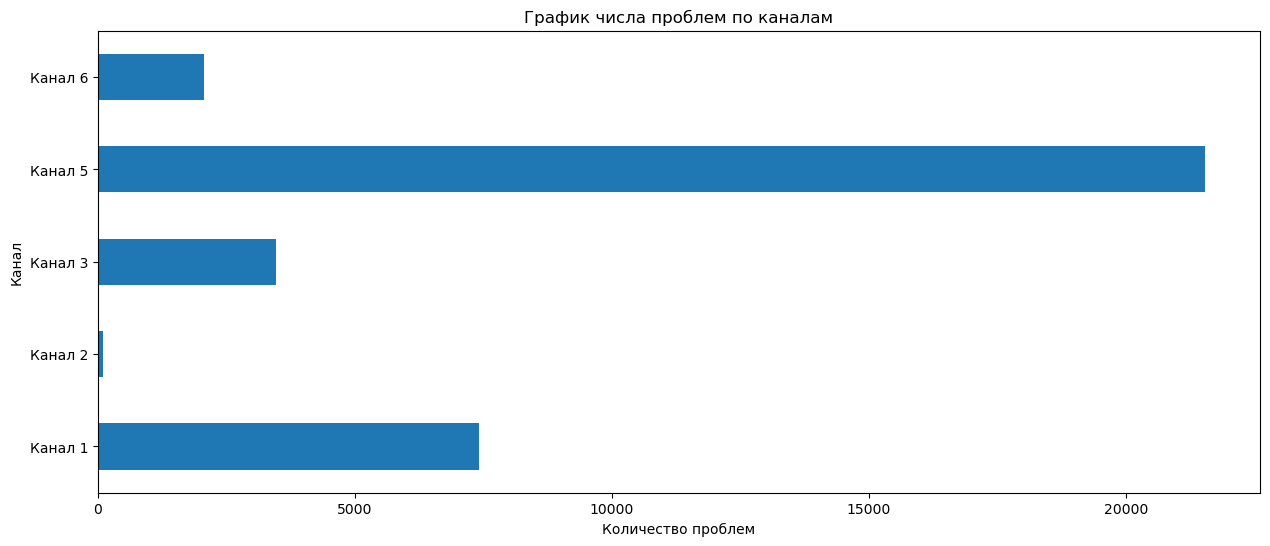

In [7]:
plt.figure(figsize=(15, 6))
data.groupby('CHANNEL')['CANCEL_FLG'].sum().plot(kind='barh')
plt.title('График числа проблем по каналам')
plt.xlabel('Количество проблем')
plt.ylabel('Канал')
plt.show()

ВЫВОД: Как мы можем видеть на графике больше всего технических проблем с каналом номер 5.

### 2. Определить месяц с большей долей тех. проблем.

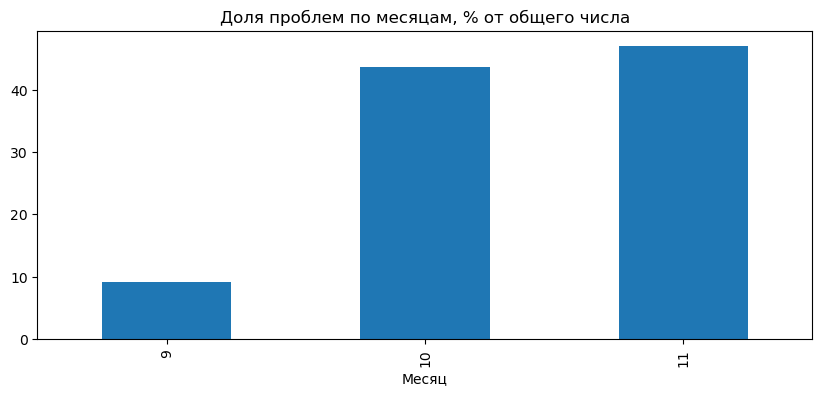

In [8]:
plt.figure(figsize=(10, 4))
round(data.groupby('MONTH')['CANCEL_FLG'].sum()/data.groupby('MONTH')['CANCEL_FLG'].sum().sum()*100, 2).plot(kind='bar')
plt.title('Доля проблем по месяцам, % от общего числа')
plt.xlabel('Месяц')
plt.show()

ВЫВОД: Больше всего доля технических проблем в ноябре (11-й месяц)

### 3. Определить продукт, коммуникации по которому меньше всего доходят до клиента (клиент ее не видит) и это не связано с тех. проблемами

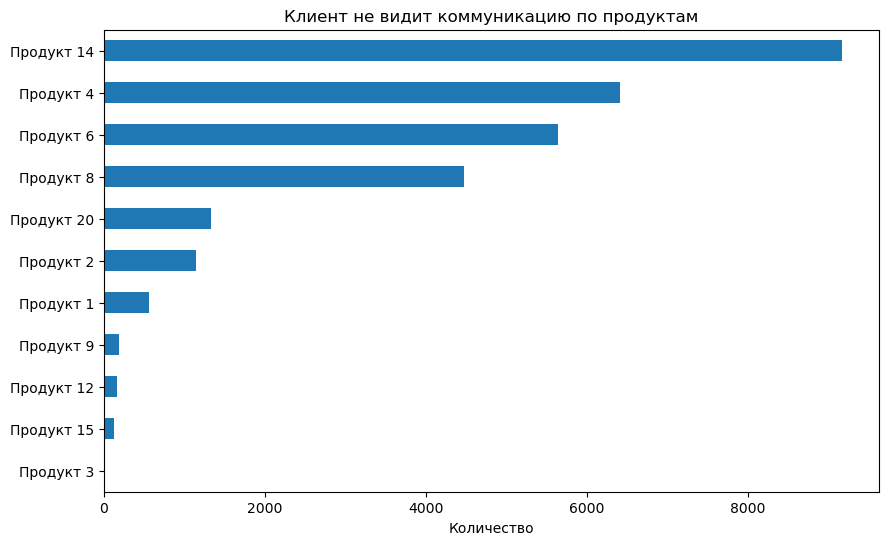

In [9]:
plt.figure(figsize=(10, 6))
data.query("CANCEL_FLG == 0").groupby('PRODUCT_NM')['NOTBE_FLG'].sum().sort_values(ascending=True).plot(kind='barh')
plt.title('Клиент не видит коммуникацию по продуктам')
plt.xlabel('Количество')
plt.ylabel('')
plt.show()

ВЫВОД: По продукту №14 коммуникации меньше всего доходят до клиентов (они их не видят). При этом это не связано с техническими проблемами.

### 4. Определить продукт, к которому клиенты не проявляют интереса

Будем считать, что непроявление интереса это когда коммуникация с клиентом прошла, но клиент не отреагировал (например, не перешел по ссылке). Такие коммуникации имеют в поле **AGRY_FLG** значение **0**. При этом мы помним, что возможны случаи, когда клиент самостоятельно может оформить продукт, независимо от статуса коммуникации. Значит такие коммуникации, по которым есть подписание договора или заявки, тоже стоит исключить.

In [10]:
data.query('AGRY_FLG == 0 & AGREEMENT == 0 & APPL == 0').groupby('PRODUCT_NM')['AGRY_FLG'].count().sort_values(ascending=False)

PRODUCT_NM
Продукт 14    31557
Продукт 8     20938
Продукт 6     17583
Продукт 4     12599
Продукт 20     4026
Продукт 1      3201
Продукт 2      2137
Продукт 12     1822
Продукт 9       262
Продукт 15      254
Продукт 3        17
Name: AGRY_FLG, dtype: int64

К продукту №14 клиенты проявляют меньше всего интереса. Возможно всё дело в том, что по нему коммуникации меньше всего доходят до клиентов. Мы можем это проверить добавив в отбор условие, чтобы клиент увидел коммуникацию **NOTBE_FLG = 0**.

In [11]:
data.query('AGRY_FLG == 0 & AGREEMENT == 0 & APPL == 0 & NOTBE_FLG == 0') \
    .groupby('PRODUCT_NM')['AGRY_FLG'].count().sort_values(ascending=False)

PRODUCT_NM
Продукт 14    23737
Продукт 8     16607
Продукт 6     12329
Продукт 4      6970
Продукт 20     2745
Продукт 1      2714
Продукт 12     1662
Продукт 2      1243
Продукт 15      135
Продукт 9        96
Продукт 3        13
Name: AGRY_FLG, dtype: int64

ВЫВОД: К продукту №14 клиенты действительно проявляют меньше всего интереса. При этом вне зависимости видел ли клиент коммуникацию или нет.

### 5. Определить связку канал-продукт, по которой было больше всего коммуникаций за месяц

In [12]:
data.query('MONTH == 9').groupby(['MONTH', 'CHANNEL_PRODUCT'])['CHANNEL_PRODUCT'].count().sort_values(ascending=False).head(1)

MONTH  CHANNEL_PRODUCT     
9      Канал 5 - Продукт 14    4043
Name: CHANNEL_PRODUCT, dtype: int64

In [13]:
data.query('MONTH == 10').groupby(['MONTH', 'CHANNEL_PRODUCT'])['CHANNEL_PRODUCT'].count().sort_values(ascending=False).head(1)

MONTH  CHANNEL_PRODUCT     
10     Канал 5 - Продукт 14    11877
Name: CHANNEL_PRODUCT, dtype: int64

In [14]:
data.query('MONTH == 11').groupby(['MONTH', 'CHANNEL_PRODUCT'])['CHANNEL_PRODUCT'].count().sort_values(ascending=False).head(1)

MONTH  CHANNEL_PRODUCT     
11     Канал 5 - Продукт 14    19494
Name: CHANNEL_PRODUCT, dtype: int64

ВЫВОД: Больше всего коммуникаций в сентябре, октябре и ноябре было в связке: *Канал 5 - Продукт 14*

### 6. Определить канал, от которого больше всего эффект (доля продаж через коммуникации выше чем доля самостоятельных «покупок» клиента не связанных с коммуникацией).

In [15]:
# найдем доли каналов в продажах, когда коммуникация была успешной

df1 = round(data.query('AGRY_FLG == 1 and (AGREEMENT == 1 or APPL == 1)') \
        .groupby('CHANNEL')['CHANNEL'].count() / data.query('AGRY_FLG == 1 and (AGREEMENT == 1 or APPL == 1)') \
        .groupby('CHANNEL')['CHANNEL'].count().sum() * 100, 2)

In [16]:
df1

CHANNEL
Канал 1    52.06
Канал 2     0.04
Канал 3    16.48
Канал 5    30.79
Канал 6     0.63
Name: CHANNEL, dtype: float64

In [17]:
# найдем доли каналов в продажах, когда коммуникация не была признана успешной, но "покупка" состоялась

df2 = round(data.query('AGRY_FLG == 0 and (AGREEMENT == 1 or APPL == 1)') \
        .groupby('CHANNEL')['CHANNEL'].count() /data.query('AGRY_FLG == 1 and (AGREEMENT == 1 or APPL == 1)') \
        .groupby('CHANNEL')['CHANNEL'].count().sum() * 100, 2)

In [18]:
df2

CHANNEL
Канал 1    23.58
Канал 2     0.21
Канал 3    27.75
Канал 5    45.97
Канал 6     4.36
Name: CHANNEL, dtype: float64

In [19]:
# посмотрим на разницу процентов. Вычтем из долей, когда коммуникация была успешной доли, когда коммуникация была не успешна
# у кого будет больше положительная разность, у того канала больше всего эффект

df1-df2

CHANNEL
Канал 1    28.48
Канал 2    -0.17
Канал 3   -11.27
Канал 5   -15.18
Канал 6    -3.73
Name: CHANNEL, dtype: float64

ВЫВОД: Самым эффективным каналом является **Канал 1**. Доля продаж через коммуникации выше, чем без них.